In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime

# Load CSV file into a DataFrame
df_sales = pd.read_csv('Processed/data_clean.csv')
df_items = pd.read_csv('Processed/items_clean.csv')
df_oil_M = pd.read_csv('Processed/oil(india)_monthly_clean.csv') #date (y-m),unit, price, change, price_per_unit
df_oil_D = pd.read_csv('Processed/oil(india)_daily_clean.csv') #date, dcoilwtico


# Columns of interest
df_sales = df_sales[['id','date', 'store_nbr',  'item_nbr', 'unit_sales',  'onpromotion']]
df_items = df_items[['item_nbr', 'class', 'family', 'perishable', 'Price']]

# MERGE items
df = pd.merge(df_sales, df_items, on='item_nbr')

# Add total sales
df['total_sales'] = df['unit_sales'] * df['Price']

#ADD WEEKDAY
df['date'] = pd.to_datetime(df['date']).dt.date


print(df_oil_D.head(5))
df_oil_D['date'] = pd.to_datetime(df_oil_D['date']) #, format='%Y-%b-%d')
df_oil_D['date'] = df_oil_D['date'].dt.date
df = pd.merge(df, df_oil_D, on='date', how='left')

df.to_csv('Processed/salesbyoil_clean.csv', index=False)




         date  dcoilwtico
0  2013-03-26       95.99
1  2013-03-27       96.53
2  2013-03-28       97.24
3  2013-04-01       97.10
4  2013-04-02       97.23


In [3]:
df['date'] = pd.to_datetime(df['date'])
df['month'] = df['date'].dt.month
df['year'] = df['date'].dt.year
df_oil_M['date'] = pd.to_datetime(df_oil_M['date'])
df_oil_M['month'] = df_oil_M['date'].dt.month
df_oil_M['year'] = df_oil_M['date'].dt.year

print(df.head(5), df_oil_M.head(5), "\n------------")
merged_df = pd.merge(df, df_oil_M, on=['month', 'year'], suffixes=('_df', '_oil_M'))

# Drop the 'month' column if you don't need it anymore
merged_df.drop(['month', 'year'], axis=1, inplace=True)

# Display the merged DataFrame
print(merged_df)


       id       date  store_nbr  item_nbr  unit_sales  onpromotion  class  \
0       0 2013-01-01         25    103665         7.0            0   2712   
1    3900 2013-01-02          4    103665         2.0            0   2712   
2  139860 2013-01-05         23    103665         2.0            0   2712   
3  181860 2013-01-06         23    103665         9.0            0   2712   
4  377340 2013-01-11         18    103665         1.0            0   2712   

         family  perishable     Price  total_sales  dcoilwtico  month  year  
0  BREAD/BAKERY           1  2.753766    19.276365         NaN      1  2013  
1  BREAD/BAKERY           1  2.753766     5.507533         NaN      1  2013  
2  BREAD/BAKERY           1  2.753766     5.507533         NaN      1  2013  
3  BREAD/BAKERY           1  2.753766    24.783897         NaN      1  2013  
4  BREAD/BAKERY           1  2.753766     2.753766         NaN      1  2013           date  unit   price  change  price_per_unit  month  year
0 201

In [4]:
df

,id,date,store_nbr,item_nbr,unit_sales,onpromotion,class,family,perishable,Price,total_sales,dcoilwtico,month,year
0,0,2013-01-01,25,103665,7.0,0,2712,BREAD/BAKERY,1,2.753766,19.276365,NaN,1,2013
1,3900,2013-01-02,4,103665,2.0,0,2712,BREAD/BAKERY,1,2.753766,5.507533,NaN,1,2013
2,139860,2013-01-05,23,103665,2.0,0,2712,BREAD/BAKERY,1,2.753766,5.507533,NaN,1,2013
3,181860,2013-01-06,23,103665,9.0,0,2712,BREAD/BAKERY,1,2.753766,24.783897,NaN,1,2013
4,377340,2013-01-11,18,103665,1.0,0,2712,BREAD/BAKERY,1,2.753766,2.753766,NaN,1,2013
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2091613,125125140,2017-08-12,24,2123791,1.0,0,1068,GROCERY I,0,7.418505,7.418505,NaN,8,2017
2091614,125230200,2017-08-13,24,2123791,2.0,0,1068,GROCERY I,0,7.418505,14.837009,NaN,8,2017
2091615,125391120,2017-08-14,52,2123791,1.0,0,1068,GROCERY I,0,7.418505,7.418505,47.59,8,2017
2091616,125161080,2017-08-12,44,2123859,2.0,0,1318,"LIQUOR,WINE,BEER",0,18.482206,36.964411,NaN,8,2017


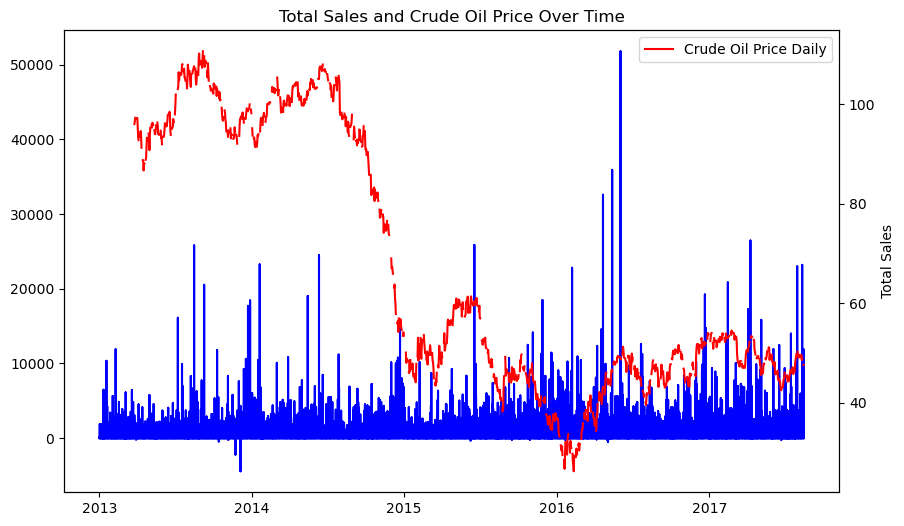

In [5]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming df is your DataFrame containing the data
# Convert 'date' column to datetime format
df['date'] = pd.to_datetime(df['date'])

# Sort DataFrame by 'date'
df = df.sort_values('date')

# Plot total_sales
plt.figure(figsize=(10, 6))
plt.plot(df['date'], df['total_sales'], color='blue', label='Total Sales')

# Create a second y-axis for dcoilwtico
plt.twinx()
plt.plot(df['date'], df['dcoilwtico'], color='red', label='Crude Oil Price Daily')

# Set labels and title
plt.xlabel('Date')
plt.ylabel('Total Sales')
plt.title('Total Sales and Crude Oil Price Over Time')
plt.legend()

plt.show()


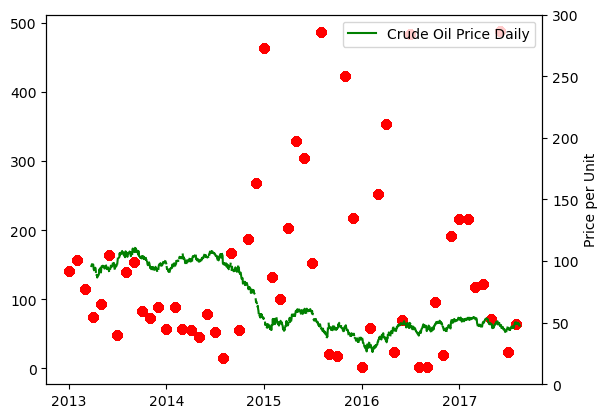

In [29]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming df is your DataFrame containing the data
# Convert 'date' column to datetime format
merged_df['date'] = pd.to_datetime(df['date'])

# Sort DataFrame by 'date'
merged_df = merged_df.sort_values('date')

unique_data = merged_df.drop_duplicates(subset=['date', 'price_per_unit'])
unique_data2 = merged_df.drop_duplicates(subset=['date', 'price'])
unique_data = unique_data[unique_data['price_per_unit'] != 0]

plt.scatter(unique_data2['date_oil_M'], unique_data2['price_per_unit'], color='red', label='Price/Unit?')
# plt.scatter(unique_data2['date_oil_M'], unique_data2['price'], color='blue', label='Price')
plt.twinx()
plt.plot(df['date'], df['dcoilwtico'], color='green', label='Crude Oil Price Daily')
plt.xlabel('Date')
plt.ylabel('Price per Unit')
plt.ylim(0, 300)
plt.legend()
plt.show()